# McDonald's Card Data Split v1.
## March 2018
### Dr Jose M Albornoz

This notebook splits card data into tow sets: one containing Toshiba card tokens, and the other containing Ingenico card tokens.

# 1.- Import necessary modules, define SQLContext

In [100]:
# Import required modules
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np

In [2]:
# Define SQLContext
sqlContext = SQLContext(sc)

# 2.- Generic function to load data from a csv file

In [3]:
def load_data(filename, schema, columns = None):
    df = sqlContext.read.format('com.databricks.spark.csv').option("delimiter", ";").options(header='false'). \
    load(filename, schema = schema)
    if columns is None:
        # If no columns are given, then select all
        columns = schema.names
    return df.select(columns)

# 3.- Data schema

In [4]:
schema = StructType([ 
    StructField('store_number', IntegerType(), True), 
    StructField('terminal_number', IntegerType(), True), 
    StructField('transaction_date', StringType(), True), 
    StructField('transaction_time', IntegerType(), True), 
    StructField('transaction_amount', IntegerType(), True),
    StructField('card_scheme', StringType(), True),
    StructField('pan_token', StringType(), True),
    StructField('empty_field', IntegerType(), True)    
])

# 4.- September 2017

## 4.1.- Load data

In [5]:
filename = 'McD_Card_Data/CT_201709_p1.csv'
df_p1 = load_data(filename, schema)

In [6]:
filename = 'McD_Card_Data/CT_201709_p2.csv'
df_p2 = load_data(filename, schema)

In [7]:
filename = 'McD_Card_Data/CT_201709_p3.csv'
df_p3 = load_data(filename, schema)

## 4.2.- Concatenate data

In [8]:
df_data = df_p1.unionAll(df_p2)

In [9]:
df_data = df_data.unionAll(df_p3)

## 4.3.- Filter data according to token type

In [10]:
# Toshiba tokens
df_dataT = df_data.where(length(col("pan_token")) == 64)

In [11]:
# Ingenico tokens
df_dataI = df_data.where(length(col("pan_token")) == 19)

## 4.4.- Write data to disk

In [22]:
df_dataT \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Sep2017_T.csv")

In [23]:
df_dataI \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Sep2017_I.csv")

## 4.5.- Obtains counts for each token type

In [24]:
Sep2017T = df_dataT.count()

In [25]:
Sep2017I = df_dataI.count()

## 4.6.- Unpersist unnecessary data

In [26]:
df_p1.unpersist()
df_p2.unpersist()
df_p3.unpersist()
df_data.unpersist()

DataFrame[store_number: int, terminal_number: int, transaction_date: string, transaction_time: int, transaction_amount: int, card_scheme: string, pan_token: string, empty_field: int]

# 5.- October 2017

## 5.1.- Load data

In [27]:
filename = 'McD_Card_Data/CT_201710_p1.csv'
df_p1 = load_data(filename, schema)

In [28]:
filename = 'McD_Card_Data/CT_201710_p2.csv'
df_p2 = load_data(filename, schema)

In [29]:
filename = 'McD_Card_Data/CT_201710_p3.csv'
df_p3 = load_data(filename, schema)

## 5.2.- Concatenate data

In [30]:
df_data = df_p1.unionAll(df_p2)

In [31]:
df_data = df_data.unionAll(df_p3)

## 5.3.- Filter data according to token type

In [32]:
# Toshiba tokens
df_dataT = df_data.where(length(col("pan_token")) == 64)

In [33]:
# Ingenico tokens
df_dataI = df_data.where(length(col("pan_token")) == 19)

## 5.4.- Write data to disk

In [35]:
df_dataT \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Oct2017_T.csv")

In [36]:
df_dataI \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Oct2017_I.csv")

## 5.5.- Obtains counts for each token type

In [37]:
Oct2017T = df_dataT.count()

In [38]:
Oct2017I = df_dataI.count()

## 5.6.- Unpersist unnecessary data

In [39]:
df_p1.unpersist()
df_p2.unpersist()
df_p3.unpersist()
df_data.unpersist()

DataFrame[store_number: int, terminal_number: int, transaction_date: string, transaction_time: int, transaction_amount: int, card_scheme: string, pan_token: string, empty_field: int]

# 6.- November 2017

## 6.1.- Load data

In [40]:
filename = 'McD_Card_Data/CT_201711_p1.csv'
df_p1 = load_data(filename, schema)

In [41]:
filename = 'McD_Card_Data/CT_201711_p2.csv'
df_p2 = load_data(filename, schema)

In [42]:
filename = 'McD_Card_Data/CT_201711_p3.csv'
df_p3 = load_data(filename, schema)

## 6.2.- Concatenate data

In [43]:
df_data = df_p1.unionAll(df_p2)

In [44]:
df_data = df_data.unionAll(df_p3)

## 6.3.- Filter data according to token type

In [45]:
# Toshiba tokens
df_dataT = df_data.where(length(col("pan_token")) == 64)

In [46]:
# Ingenico tokens
df_dataI = df_data.where(length(col("pan_token")) == 19)

## 6.4.- Write data to disk

In [47]:
df_dataT \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Nov2017_T.csv")

In [48]:
df_dataI \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Nov2017_I.csv")

## 6.5.- Obtains counts for each token type

In [49]:
Nov2017T = df_dataT.count()

In [50]:
Nov2017I = df_dataI.count()

## 6.6.- Unpersist unnecessary data

In [51]:
df_p1.unpersist()
df_p2.unpersist()
df_p3.unpersist()
df_data.unpersist()

DataFrame[store_number: int, terminal_number: int, transaction_date: string, transaction_time: int, transaction_amount: int, card_scheme: string, pan_token: string, empty_field: int]

# 7.- December 2017

## 7.1.- Load data

In [52]:
filename = 'McD_Card_Data/CT_201712_p1.csv'
df_p1 = load_data(filename, schema)

In [53]:
filename = 'McD_Card_Data/CT_201712_p2.csv'
df_p2 = load_data(filename, schema)

In [54]:
filename = 'McD_Card_Data/CT_201712_p3.csv'
df_p3 = load_data(filename, schema)

## 7.2.- Concatenate data

In [55]:
df_data = df_p1.unionAll(df_p2)

In [56]:
df_data = df_data.unionAll(df_p3)

## 7.3.- Filter data according to token type

In [57]:
# Toshiba tokens
df_dataT = df_data.where(length(col("pan_token")) == 64)

In [58]:
# Ingenico tokens
df_dataI = df_data.where(length(col("pan_token")) == 19)

## 7.4.- Write data to disk

In [59]:
df_dataT \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Dec2017_T.csv")

In [60]:
df_dataI \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Dec2017_I.csv")

## 7.5.- Obtains counts for each token type

In [61]:
Dec2017T = df_dataT.count()

In [62]:
Dec2017I = df_dataI.count()

## 7.6.- Unpersist unnecessary data

In [63]:
df_p1.unpersist()
df_p2.unpersist()
df_p3.unpersist()
df_data.unpersist()

DataFrame[store_number: int, terminal_number: int, transaction_date: string, transaction_time: int, transaction_amount: int, card_scheme: string, pan_token: string, empty_field: int]

# 8.- January 2018

## 8.1.- Load data

In [64]:
filename = 'McD_Card_Data/CT_201801_p1.csv'
df_p1 = load_data(filename, schema)

In [65]:
filename = 'McD_Card_Data/CT_201801_p2.csv'
df_p2 = load_data(filename, schema)

In [67]:
filename = 'McD_Card_Data/CT_201801_p3.csv'
df_p3 = load_data(filename, schema)

## 8.2.- Concatenate data

In [68]:
df_data = df_p1.unionAll(df_p2)

In [69]:
df_data = df_data.unionAll(df_p3)

## 8.3.- Filter data according to token type

In [70]:
# Toshiba tokens
df_dataT = df_data.where(length(col("pan_token")) == 64)

In [71]:
# Ingenico tokens
df_dataI = df_data.where(length(col("pan_token")) == 19)

## 8.4.- Write data to disk

In [72]:
df_dataT \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Jan2018_T.csv")

In [73]:
df_dataI \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Jan2018_I.csv")

## 8.5.- Obtains counts for each token type

In [74]:
Jan2018T = df_dataT.count()

In [75]:
Jan2018I = df_dataI.count()

## 8.6.- Unpersist unnecessary data

In [76]:
df_p1.unpersist()
df_p2.unpersist()
df_p3.unpersist()
df_data.unpersist()

DataFrame[store_number: int, terminal_number: int, transaction_date: string, transaction_time: int, transaction_amount: int, card_scheme: string, pan_token: string, empty_field: int]

# 9.- February 2018

## 9.1.- Load data

In [77]:
filename = 'McD_Card_Data/CT_201802_p1.csv'
df_p1 = load_data(filename, schema)

In [78]:
filename = 'McD_Card_Data/CT_201802_p2.csv'
df_p2 = load_data(filename, schema)

In [79]:
filename = 'McD_Card_Data/CT_201802_p3.csv'
df_p3 = load_data(filename, schema)

## 9.2.- Concatenate data

In [80]:
df_data = df_p1.unionAll(df_p2)

In [81]:
df_data = df_data.unionAll(df_p3)

## 9.3.- Filter data according to token type

In [82]:
# Toshiba tokens
df_dataT = df_data.where(length(col("pan_token")) == 64)

In [83]:
# Ingenico tokens
df_dataI = df_data.where(length(col("pan_token")) == 19)

## 9.4.- Write data to disk

In [84]:
df_dataT \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Feb2018_T.csv")

In [85]:
df_dataI \
    .repartition(1) \
    .write.format("com.databricks.spark.csv") \
    .option("header", "true") \
    .save("Feb2018_I.csv")

## 9.5.- Obtains counts for each token type

In [86]:
Feb2018T = df_dataT.count()

In [87]:
Feb2018I = df_dataI.count()

## 9.6.- Unpersist unnecessary data

In [88]:
df_p1.unpersist()
df_p2.unpersist()
df_p3.unpersist()
df_data.unpersist()

DataFrame[store_number: int, terminal_number: int, transaction_date: string, transaction_time: int, transaction_amount: int, card_scheme: string, pan_token: string, empty_field: int]

# 10 Plots

In [89]:
countT = [Sep2017T, Oct2017T, Nov2017T, Dec2017T, Jan2018T, Feb2018T]

In [90]:
countI = [Sep2017I, Oct2017I, Nov2017I, Dec2017I, Jan2018I, Feb2018I]

In [91]:
x = ['Sep2017', 'Oct2017', 'Nov2017', 'Dec2017', 'Jan2018', 'Feb2018']

Text(0,0.5,'Transaction count')

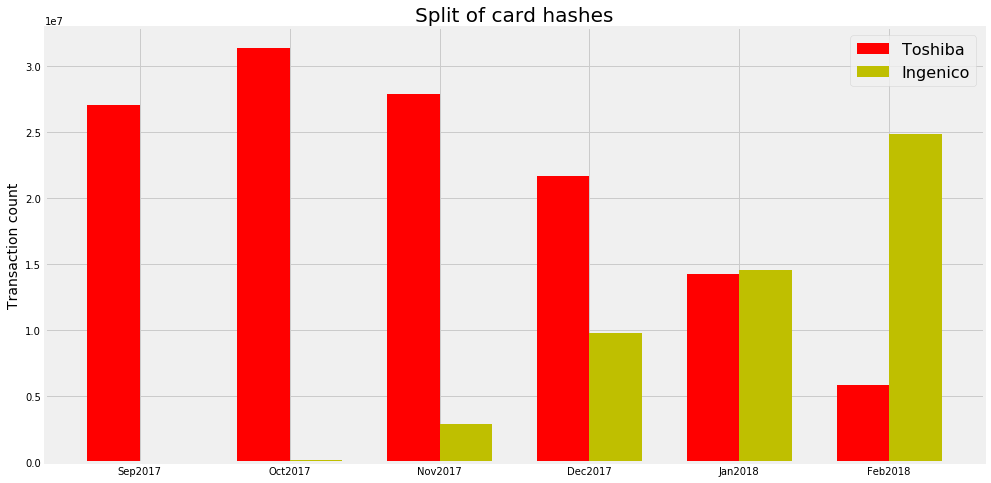

In [109]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
style.use('fivethirtyeight')
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 8))

ind = np.arange(len(x))  # the x locations for the groups
width = 0.35       # the width of the bars

rects1 = ax.bar(ind, countT, width, color='r', label='Toshiba')
rects2 = ax.bar(ind + width, countI, width, color='y', label='Ingenico')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

plt.legend(fontsize=16)
plt.title('Split of card hashes', fontsize=20)
plt.ylabel('Transaction count', fontsize=14)

In [128]:
count = [(ai + bi) for ai,bi in zip(countT, countI)]

In [129]:
countT_pct = [(ai/bi) for ai,bi in zip(countT, count)]

In [130]:
countI_pct = [(ai/bi) for ai,bi in zip(countI, count)]

Text(0,0.5,'Fraction of total transaction count')

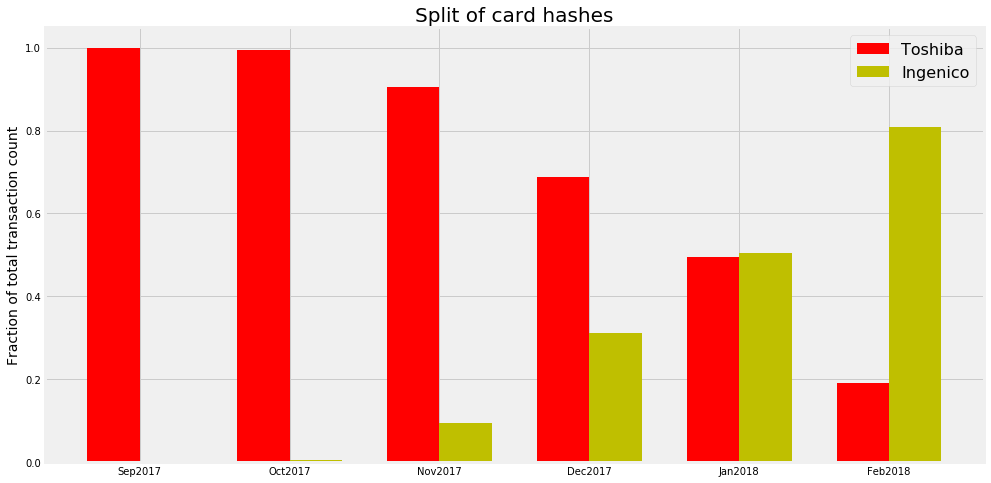

In [134]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
style.use('fivethirtyeight')
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 8))

ind = np.arange(len(x))  # the x locations for the groups
width = 0.35       # the width of the bars

rects1 = ax.bar(ind, countT_pct, width, color='r', label='Toshiba')
rects2 = ax.bar(ind + width, countI_pct, width, color='y', label='Ingenico')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

plt.legend(fontsize=16)
plt.title('Split of card hashes', fontsize=20)
plt.ylabel('Fraction of total transaction count', fontsize=14)